In [1]:
import	os
import	tarfile
from	six.moves	import	urllib
DOWNLOAD_ROOT	=	"https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH	=	"datasets/housing"
HOUSING_URL	=	DOWNLOAD_ROOT	+	HOUSING_PATH	+	"/housing.tgz"

def	fetch_housing_data(housing_url=HOUSING_URL,	housing_path=HOUSING_PATH):
				if	not	os.path.isdir(housing_path):
								os.makedirs(housing_path)
				tgz_path	=	os.path.join(housing_path,	"housing.tgz")
				urllib.request.urlretrieve(housing_url,	tgz_path)
				housing_tgz	=	tarfile.open(tgz_path)
				housing_tgz.extractall(path=housing_path)
				housing_tgz.close()

In [2]:
import	pandas	as	pd
def	load_housing_data(housing_path=HOUSING_PATH):
				csv_path	=	os.path.join(housing_path,	"housing.csv")
				return	pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


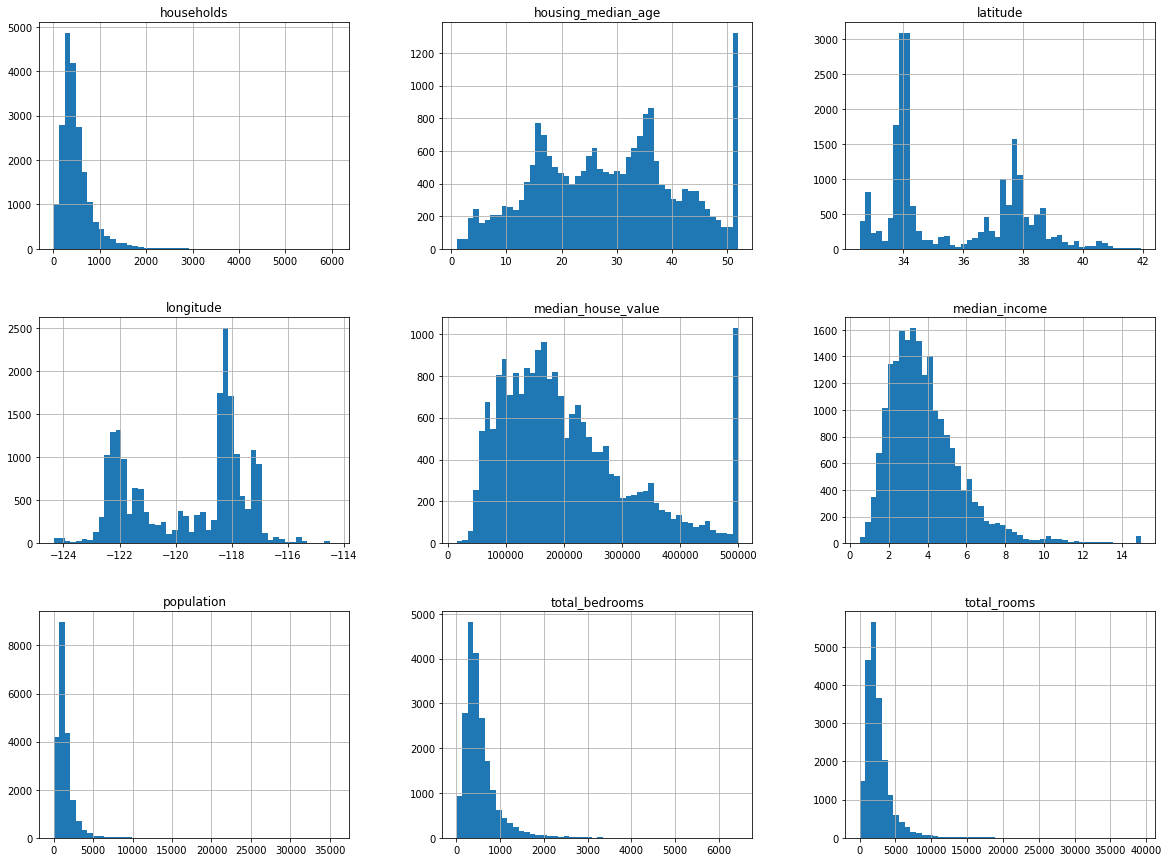

In [7]:
%matplotlib inline
import	matplotlib.pyplot	as	plt
housing.hist(bins=50,	figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22cbb7b470>]],
      dtype=object)

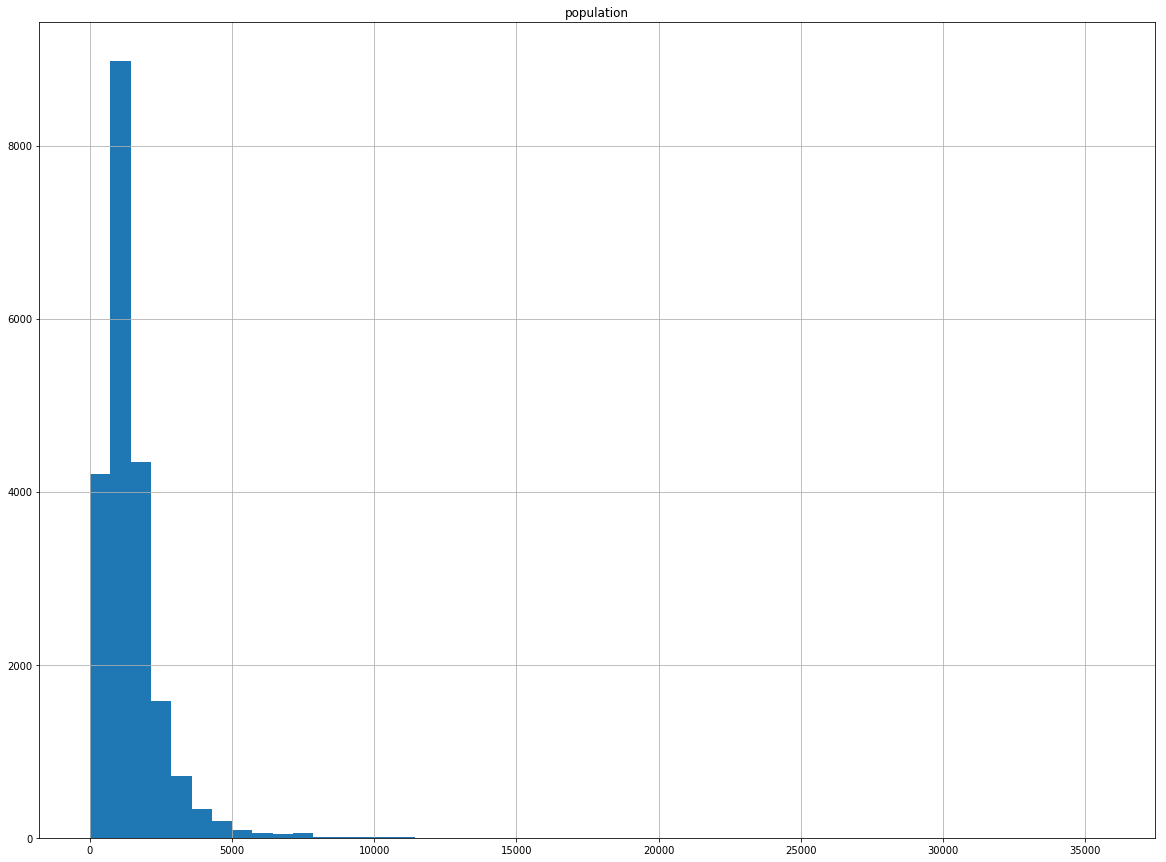

In [8]:
housing.hist(column='population', bins=50,	figsize=(20,15))

In [9]:
import	numpy	as	np
def	split_train_test(data,	test_ratio):
				shuffled_indices	=	np.random.permutation(len(data))
				test_set_size	=	int(len(data)	*	test_ratio)
				test_indices	=	shuffled_indices[:test_set_size]
				train_indices	=	shuffled_indices[test_set_size:]
				return	data.iloc[train_indices],	data.iloc[test_indices]

In [10]:
train_set,	test_set	=	split_train_test(housing,	0.2)

In [11]:
print(len(train_set),	"train	+",	len(test_set),	"test")

16512 train	+ 4128 test


In [12]:
import	hashlib
def	test_set_check(identifier,	test_ratio,	hash):
				return	hash(np.int64(identifier)).digest()[-1]	<	256	*	test_ratio
def	split_train_test_by_id(data,	test_ratio,	id_column,	hash=hashlib.md5):
				ids	=	data[id_column]
				in_test_set	=	ids.apply(lambda	id_:	test_set_check(id_,	test_ratio,	hash))
				return	data.loc[~in_test_set],	data.loc[in_test_set]

In [13]:
housing_with_id	=	housing.reset_index()

In [14]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
train_set,	test_set	=	split_train_test_by_id(housing_with_id,	0.2,	"index")

In [16]:
# We can use another (more stable) feature as identifier, like longitude/latitude
housing_with_id["id"]	=	housing["longitude"]	*	1000	+	housing["latitude"]
train_set,	test_set	=	split_train_test_by_id(housing_with_id,	0.2,	"id")

In [17]:
# We can use the scikit function train_test_split (like the split_train_test)
from	sklearn.model_selection	import	train_test_split
train_set,	test_set	=	train_test_split(housing,	test_size=0.2,	random_state=42)

In [18]:
housing["income_cat"]	=	np.ceil(housing["median_income"]	/	1.5)

In [19]:
housing["income_cat"].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [20]:
housing["income_cat"].where(housing["income_cat"]	<	5,	5.0,	inplace=True)

In [21]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [22]:
# in % of the categories
housing["income_cat"].value_counts()	/	len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [23]:
# only testing the incomes categories
housing['income_cat'].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

In [24]:
from	sklearn.model_selection	import	StratifiedShuffleSplit
split	=	StratifiedShuffleSplit(n_splits=1,	test_size=0.2,	random_state=42)
for	train_index,	test_index	in	split.split(housing,	housing["income_cat"]):
				strat_train_set	=	housing.loc[train_index]
				strat_test_set	=	housing.loc[test_index]

In [25]:
# Removing the income_cat
# We spent quite a bit of time on test set generation for a good reason: this is an often neglected but 
#critical part of a Machine Learning project. Moreover, many of these ideas will be useful later when we discuss
#cross-validation. 
for	set	in	(strat_train_set,	strat_test_set):
				set.drop(["income_cat"],	axis=1,	inplace=True)

In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [27]:
# Let's explore the data
housing = strat_train_set.copy()

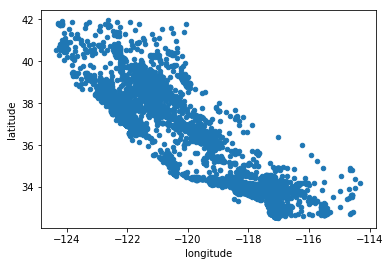

In [28]:
housing.plot(kind="scatter",	x="longitude",	y="latitude")